<a href="https://colab.research.google.com/github/mandraa/MachineLearning/blob/main/Jobsheet11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Juniar Andra Permana

Kls   : TI3G

NIM   : 2141720214

Jobsheet 11

**PRAKTIKUM 1**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/ML2023/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/ML2023')

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**Langkah 2 - Pra Pengolahan Data**

In [6]:
# Pra Pengolahan Data Training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML2023/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8017 images belonging to 2 classes.


In [7]:
# Pra Pengolahan Data Testing
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML2023/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN**

In [8]:
# Langkah 3.1.  - Inisiasi Model CNN
cnn = tf.keras.models.Sequential()

In [9]:
# Langkah 3.2. - Pembuatan Layer Konvolusi 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [10]:
# Langkah 3.3 - Pembuatan Layer Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
# Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
# Langkah 3.5 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [13]:
# Langkah 3.6 - Fully Connected Layer 1 (Input)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
# Langkah 3.7 - Fully Connected Layer 2 (Output)
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
# Langkah 3.8 - Compile Model CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 4 - Fit CNN**

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 58s 185ms/step - loss: 0.6738 - accuracy: 0.5840 - val_loss: 0.6325 - val_accuracy: 0.6500
Epoch 2/25
251/251 [==============================] - 43s 171ms/step - loss: 0.6277 - accuracy: 0.6501 - val_loss: 0.5894 - val_accuracy: 0.7005
Epoch 3/25
251/251 [==============================] - 38s 153ms/step - loss: 0.5753 - accuracy: 0.6984 - val_loss: 0.5776 - val_accuracy: 0.7035
Epoch 4/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5310 - accuracy: 0.7276 - val_loss: 0.5598 - val_accuracy: 0.7145
Epoch 5/25
251/251 [==============================] - 38s 152ms/step - loss: 0.5042 - accuracy: 0.7522 - val_loss: 0.5083 - val_accuracy: 0.7635
Epoch 6/25
251/251 [==============================] - 38s 152ms/step - loss: 0.4846 - accuracy: 0.7659 - val_loss: 0.5101 - val_accuracy: 0.7640
Epoch 7/25
251/251 [==============================] - 39s 155ms/step - loss: 0.4698 - accuracy: 0.7730 - val_loss: 0.4951 - val_ac

**Langkah 5 - Prediksi dengan 1 Citra**

In [18]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML2023/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 188ms/step


**PRAKTIKUM 2**

Langkah 1 - Load Library

In [19]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah 2 - Unduh Dataset CIFAR

In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


Langkah 3 - Verifikasi Data

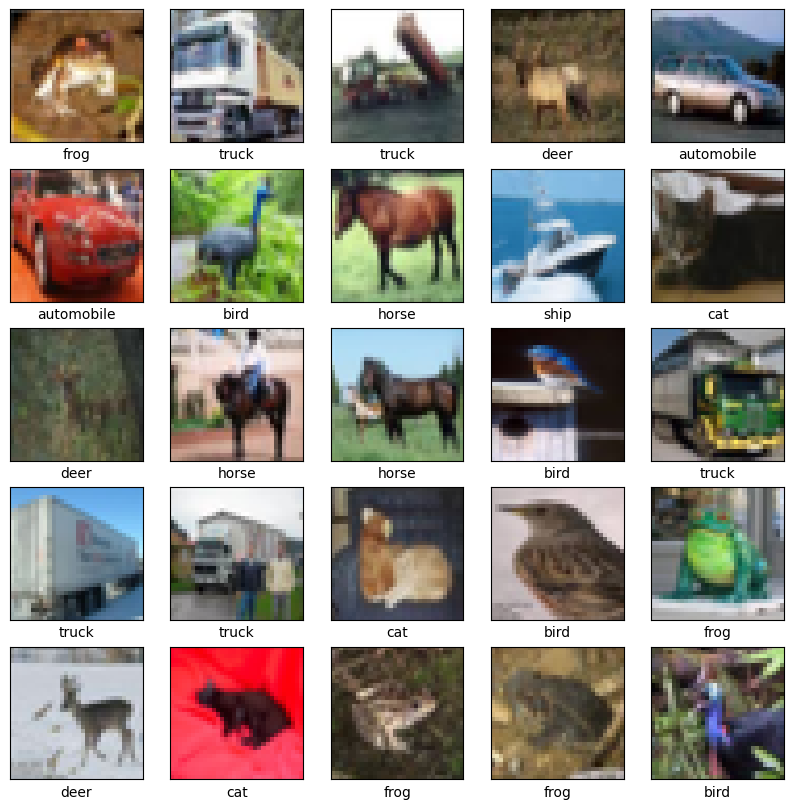

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Langkah 4 - Buat Model CNN

In [22]:
# Langkah 4.1. - Buat Layer Konvolusi
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
# Langkah 4.2. - Cek Arsitektur Konvolusi
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [24]:
# Langkah 4.3. - Tambahkan Layer Fully Connected
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [25]:
# Langkah 4.4. - Cek Arsitektur Model CNN
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [26]:
# Langkah 4.5. - Compile Model CNN
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Langkah 5 - Fit Model

In [27]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5498 - accuracy: 0.4339 - val_loss: 1.2576 - val_accuracy: 0.5448
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2105 - accuracy: 0.5715 - val_loss: 1.1704 - val_accuracy: 0.5847
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0714 - accuracy: 0.6212 - val_loss: 1.0439 - val_accuracy: 0.6273
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9786 - accuracy: 0.6553 - val_loss: 0.9897 - val_accuracy: 0.6495
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9144 - accuracy: 0.6776 - val_loss: 0.9507 - val_accuracy: 0.6672
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8587 - accuracy: 0.6999 - val_loss: 0.9485 - val_accuracy: 0.6698
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8155 - accuracy: 0.7140 - val_loss: 0.9050 - val_accurac

Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 0.8723 - accuracy: 0.7054 - 1s/epoch - 5ms/step


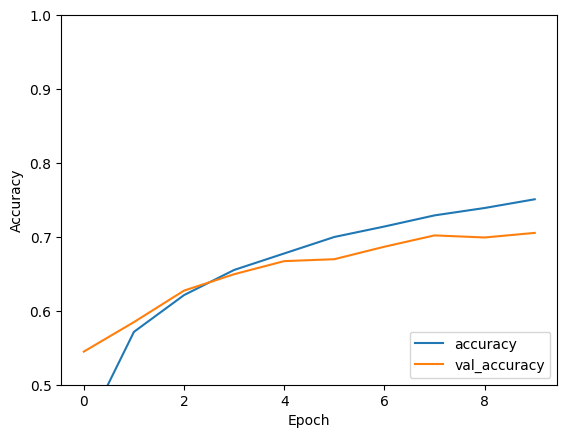

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Langkah 7 - Cetak Hasil Akurasi

In [30]:
print(test_acc)

0.7053999900817871


**TUGAS**



*   Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.



Langkah 1 - Load Library

In [31]:
# Import library dan modul yang dibutuhkan
from tensorflow.keras.datasets import cifar10 #Mengimpor dataset CIFAR-10 yang disediakan oleh TensorFlow.
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

Langkah 2 - Unduh Dataset CIFAR


In [32]:
# Memuat dataset CIFAR-10 dari TensorFlow
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Menampilkan dimensi dataset
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


Langkah 3 - Normalisasi dan One-Hot Encoding

In [33]:
# Normalisasi nilai piksel ke dalam rentang 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
# Mengubah label menjadi one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Langkah 4 - Split Data

In [34]:
# split data# Split data pelatihan menjadi data pelatihan dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Langkah 5 - Verifikasi Data

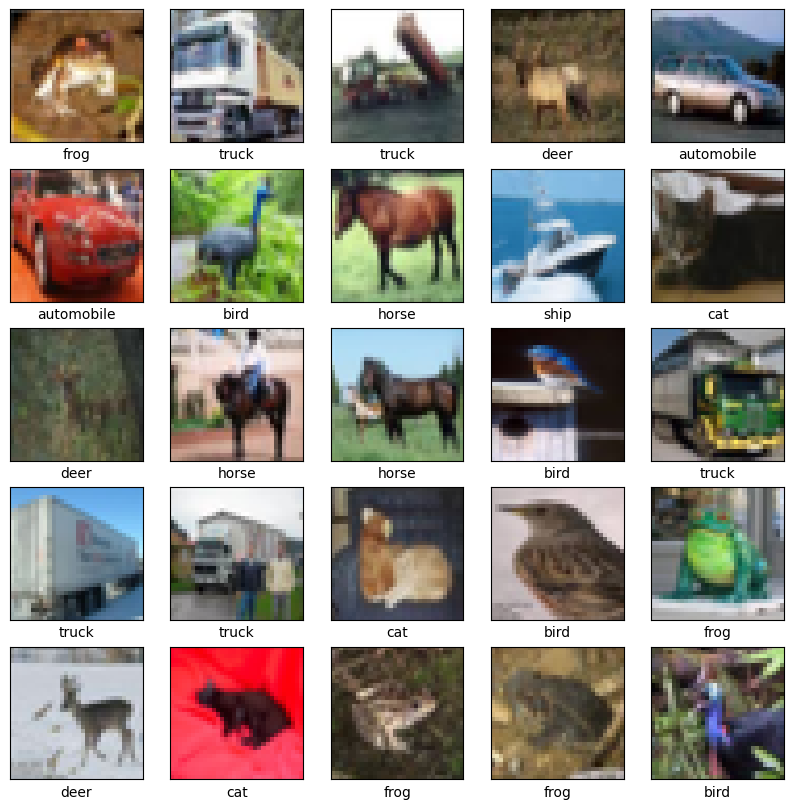

In [35]:
# Kelas-kelas untuk setiap label dalam dataset CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Membuat plot dengan ukuran 10x10 inci
plt.figure(figsize=(10,10))

# Loop untuk menampilkan 25 gambar dan labelnya
for i in range(25):
   # Membuat subplot dengan ukuran 5x5 dan indeks i+1
   plt.subplot(5,5,i+1)

   # Menghilangkan label sumbu x dan y
   plt.xticks([])
   plt.yticks([])
   plt.grid(False) # Menonaktifkan grid
   plt.imshow(train_images[i]) # Menampilkan gambar pada indeks i dari data pelatihan
   # The CIFAR labels happen to be arrays,
   # which is why you need the extra index
   plt.xlabel(class_names[train_labels[i][0]])# Menambahkan label berdasarkan kelas gambar dari train_labels
plt.show() # Menampilkan plot

Langkah 6 - Buat Model CNN

In [36]:
def cnn_model():
    # Membuat model Sequential
    model = Sequential()
    # Layer konvolusi pertama dengan 128 filter, kernel size 3x3, fungsi aktivasi ReLU, padding same, regularisasi L2, dan input shape (32, 32, 3)
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    # Layer max pooling dengan pool size 2x2
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Layer dropout untuk menghindari overfitting
    model.add(Dropout(0.3))
     # Layer konvolusi kedua dengan 256 filter, kernel size 3x3, fungsi aktivasi ReLU, padding same, regularisasi L2
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    # Layer max pooling dengan pool size 2x2
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Layer dropout
    model.add(Dropout(0.3))

    # Layer konvolusi ketiga dengan 512 filter, kernel size 3x3, fungsi aktivasi ReLU, padding same, regularisasi L2
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    # Layer konvolusi keempat dengan 512 filter, kernel size 3x3, fungsi aktivasi ReLU, padding same, regularisasi L2
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    # Layer konvolusi kelima dengan 256 filter, kernel size 3x3, fungsi aktivasi ReLU, padding same, regularisasi L2
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    # Layer max pooling dengan pool size 2x2
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Layer dropout
    model.add(Dropout(0.3))
    # Meratakan output menjadi vektor
    model.add(Flatten())

    # Fully connected layer pertama dengan 512 neuron dan fungsi aktivasi ReLU
    model.add(Dense(512, activation='relu'))
    # Layer dropout
    model.add(Dropout(0.5))
    # Fully connected layer kedua dengan 256 neuron dan fungsi aktivasi ReLU
    model.add(Dense(256, activation='relu'))
    # Layer dropout
    model.add(Dropout(0.5))
    # Fully connected layer ketiga dengan 128 neuron dan fungsi aktivasi ReLU
    model.add(Dense(128, activation='relu'))
    # Layer dropout
    model.add(Dropout(0.5))

    # Output layer dengan 10 neuron (sesuai jumlah kelas) dan fungsi aktivasi softmax
    model.add(Dense(10, activation='softmax'))
    # Menampilkan ringkasan arsitektur model
    model.summary()
    return model

Langkah 7 - Augmentasi Data

In [37]:
# Membuat objek ImageDataGenerator untuk augmentasi data
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
# Mengaplikasikan augmentasi data pada set pelatihan
datagen.fit(X_train)

Langkah 8 - Inisialisasi dan Kompilasi Model

In [38]:
# Memanggil fungsi cnn_model() untuk membuat model CNN
model = cnn_model()

# Mengompilasi model dengan fungsi loss, optimizer, dan metrik tertentu
model.compile(
    loss='categorical_crossentropy',  # Fungsi loss untuk klasifikasi multikelas
    optimizer=Adam(learning_rate=0.0003), # Pengoptimal Adam dengan learning rate 0.0003
    metrics=['accuracy']  # Metrik yang diukur adalah akurasi
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)        

Langkah 9 - Fit Model

In [39]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 42s 55ms/step - loss: 2.2473 - accuracy: 0.1588 - val_loss: 1.8789 - val_accuracy: 0.2843
Epoch 2/50
625/625 [==============================] - 35s 56ms/step - loss: 1.8218 - accuracy: 0.3163 - val_loss: 1.5244 - val_accuracy: 0.4283
Epoch 3/50
625/625 [==============================] - 35s 56ms/step - loss: 1.6003 - accuracy: 0.4146 - val_loss: 1.3508 - val_accuracy: 0.5066
Epoch 4/50
625/625 [==============================] - 34s 54ms/step - loss: 1.4507 - accuracy: 0.4904 - val_loss: 1.2397 - val_accuracy: 0.5629
Epoch 5/50
625/625 [==============================] - 34s 54ms/step - loss: 1.3482 - accuracy: 0.5343 - val_loss: 1.1996 - val_accuracy: 0.5710
Epoch 6/50
625/625 [==============================] - 33s 52ms/step - loss: 1.2717 - accuracy: 0.5645 - val_loss: 1.1792 - val_accuracy: 0.5988
Epoch 7/50
625/625 [==============================] - 33s 52ms/step - loss: 1.2170 - accuracy: 0.5893 - val_loss: 1.0538 - val_accuracy:

Langkah 10 - Evaluasi Model

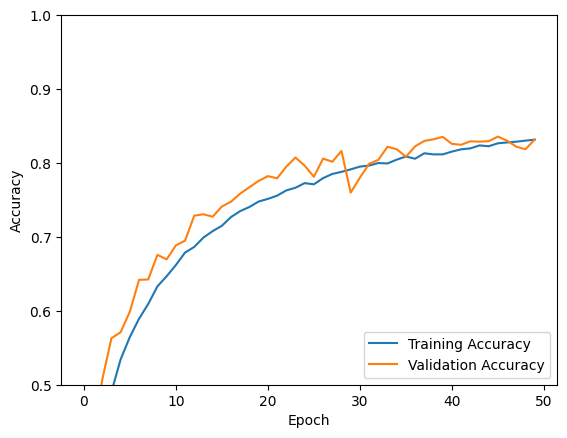

313/313 - 2s - loss: 0.6634 - accuracy: 0.8232 - 2s/epoch - 8ms/step


In [40]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1]) # Memastikan y-axis pada rentang 0.5 hingga 1
plt.legend(loc='lower right') # Menampilkan legenda pada posisi lower right
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

Langkah 11 - Cetak Hasil Akurasi

In [41]:
# Mencetak akurasi model pada data uji
print(test_acc)

0.823199987411499




*   Buatlah model CNN untuk klasifikasi dataset MNIST



In [42]:
# Impor Library
# mengimpor TensorFlow untuk membuat dan melatih model neural network.
import tensorflow as tf
# Mengimpor modul layers dan models dari Keras, yang merupakan bagian dari TensorFlow untuk membangun model neural network.
from tensorflow.keras import layers, models
#  Mengimpor dataset MNIST yang berisi gambar digit tulisan tangan.
from tensorflow.keras.datasets import mnist
# Mengimpor fungsi to_categorical untuk melakukan one-hot encoding pada label.
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [43]:
# Memuat dan membagi dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalisasi dan Reshape data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [44]:
# One-Hot Encoding label
train_labels = to_categorical(train_labels) # Melakukan one-hot encoding pada label pelatihan.
test_labels = to_categorical(test_labels) # Melakukan one-hot encoding pada label uji

In [45]:
# Membangun model CNN

#  Membuat model Sequential, yang berarti kita akan membangun model layer-by-layer secara berurutan.
model = models.Sequential()

# Menambahkan layer konvolusi dengan 32 filter, ukuran kernel 3x3, fungsi aktivasi ReLU, dan input_shape=(28, 28, 1) yang sesuai dengan dimensi gambar MNIST.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan layer pooling maksimum dengan ukuran pool 2x2 untuk mengurangi dimensi gambar.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan layer flatten untuk meratakan output dari layer sebelumnya menjadi satu dimensi.
model.add(layers.Flatten())
# Menambahkan layer dense (fully connected) dengan 64 neuron dan fungsi aktivasi ReLU.
model.add(layers.Dense(64, activation='relu'))
# Menambahkan layer output dengan 10 neuron (sesuai jumlah kelas pada MNIST) dan fungsi aktivasi softmax untuk output klasifikasi multikelas.
model.add(layers.Dense(10, activation='softmax'))

In [46]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [47]:
# Mengompilasi model dengan menggunakan optimizer Adam
# fungsi loss categorical_crossentropy (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Melatih model dengan data pelatihan selama 10 epoch, menggunakan data validasi untuk mengukur performa model selama pelatihan.
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1508 - accuracy: 0.9541 - val_loss: 0.0488 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0345 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0293 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.0273 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0309 - val_accu

313/313 - 2s - loss: 0.0350 - accuracy: 0.9912 - 2s/epoch - 6ms/step


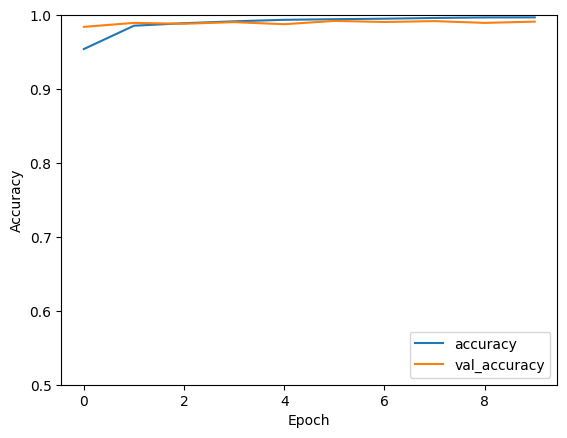

In [49]:
# Visualisasi akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [50]:
print(test_acc)

0.9911999702453613


1/1 [==============================] - 0s 189ms/step


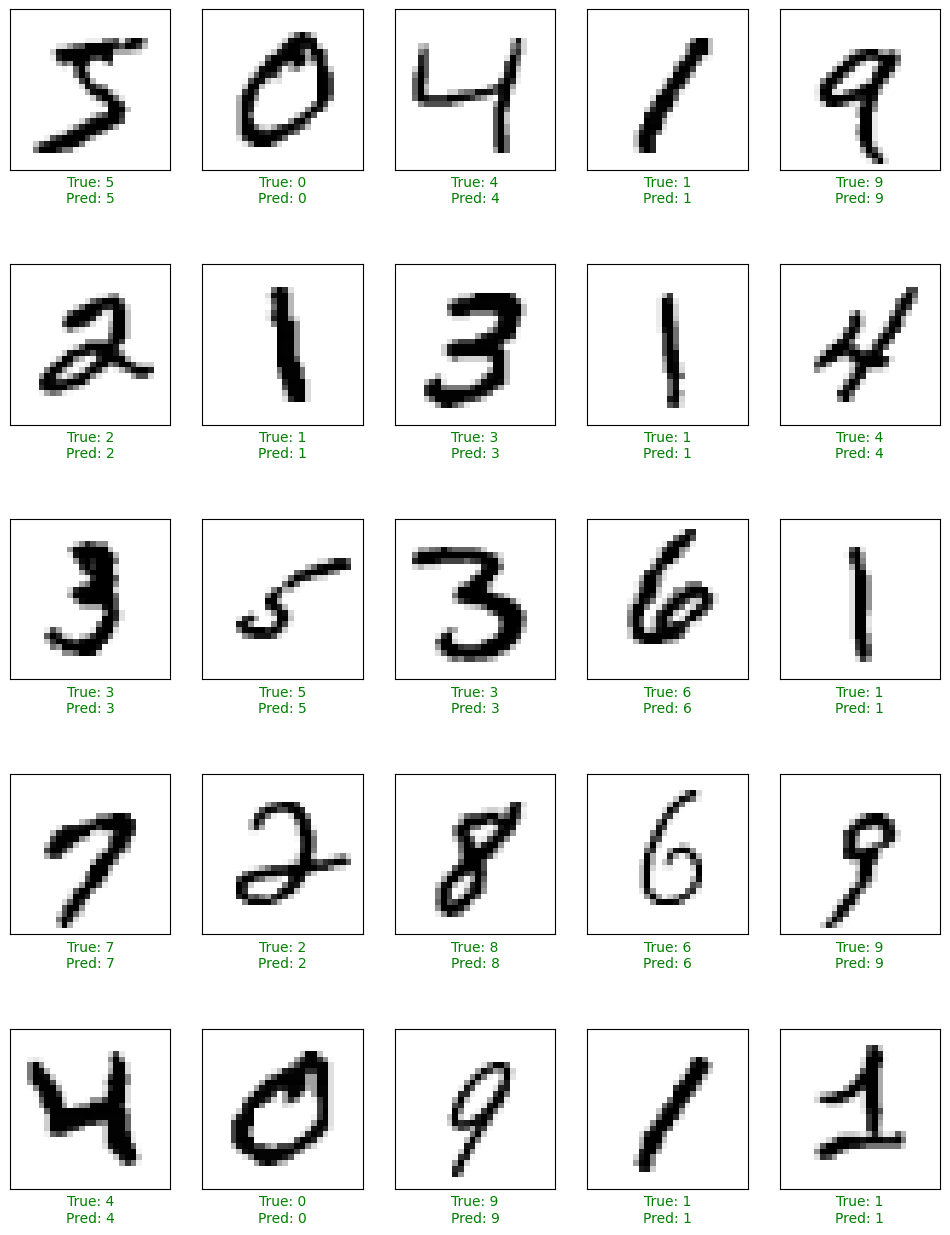

In [51]:
# Fungsi untuk menampilkan contoh hasil prediksi
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(images, true_labels, model, class_names, num_samples=25):
    # Menggunakan model untuk melakukan prediksi
    predictions = model.predict(images[:num_samples])

    # Mengubah prediksi menjadi indeks kelas dengan nilai tertinggi
    predicted_labels = np.argmax(predictions, axis=1)

    # Tampilkan hasil prediksi
    plt.figure(figsize=(12, 16))
    for i in range(num_samples):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)

        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        color = 'green' if true_label == predicted_label else 'red'
        plt.xlabel(f'True: {true_label}\nPred: {predicted_label}', color=color)

    plt.show()

# Contoh definisi class_names
class_names = [str(i) for i in range(10)]

# Memanggil fungsi untuk menampilkan hasil prediksi pada set pelatihan
visualize_predictions(train_images, np.argmax(train_labels, axis=1), model, class_names)